Exercicis d'Hipotesis Testing.

# EX01. Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [59]:
import pandas as pd

UEFA = pd.read_csv('Lligues europees UEFA.csv', sep=';', encoding='latin1')

In [60]:
print(str(UEFA.columns)+'\n')
print(UEFA.sample(5))

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

    Rk       Squad Country  LgRk  MP   W   D   L  GF  GA  ...  Pts  Pts/G  \
75  76       Cádiz     ESP    18  37   7  15  15  34  51  ...   36   0.97   
48  49    Brighton     ENG    10  37  11  15  11  39  43  ...   48   1.30   
9   10   Barcelona     ESP     2  37  21  10   6  68  36  ...   73   1.97   
80  81  Hertha BSC     GER    16  34   9   6  19  37  71  ...   33   0.97   
14  15   Tottenham     ENG     4  37  21   5  11  64  40  ...   68   1.84   

      xG   xGA   xGD  xGD/90     Last 5 Attendance  \
75  39.6  52.5 -12.9   -0.35  L D W L D      14055   
48  44.3  45.3  -1.0   -0.03  L D W W D      30931   
9   61.3  35.2  26.1    0.71  L W W W D      53933   
80  34.1  55.3 -21.2   -0.62  W W D L L      23500   
14  61.5  39.0  22.5    0.61  D W D W W      5

Mostramos todas las columnas para elegir la que más nos interesa, elegimos los puntos por partido, la más objetiva en este sentido.

In [61]:
goleadores = UEFA['Top Team Scorer']
goleadores = [x.split(' - ') for x in goleadores]
goles = [x[1] for x in goleadores]
n_goles = [int(goles) for goles in goles]
print(n_goles)

[15, 22, 27, 35, 25, 11, 21, 14, 22, 12, 11, 10, 24, 24, 21, 12, 11, 11, 9, 21, 16, 27, 20, 12, 13, 15, 9, 12, 17, 15, 9, 13, 20, 18, 20, 10, 12, 8, 12, 15, 16, 6, 8, 11, 16, 8, 14, 12, 8, 11, 8, 13, 17, 9, 8, 12, 8, 10, 11, 11, 12, 6, 10, 14, 7, 9, 17, 9, 15, 8, 8, 13, 5, 10, 9, 7, 6, 8, 5, 13, 6, 8, 10, 8, 11, 13, 5, 14, 10, 10, 8, 13, 9, 11, 9, 10, 11, 9]


Ahora ya tenemos la muestra de goles de los máximos goleadores de los equipos punteros de las ligas europeas en una lista, para poder operar con ella.

In [62]:
from scipy.stats import shapiro

stat, p = shapiro(n_goles)
print('stat=%.2f, p=%.2f\n' % (stat, p))
if p > 0.05:
 print('Gaussiana')
else:
 print('No gaussiana')

stat=0.88, p=0.00

No gaussiana


Shapiro mide la hipótesis nula de que la distribución sea Gaussiana en base al p valor. En este caso, la probabilidad de encontrar unos datos como los de `Top Team Scorer` si la distribución fuera Gaussiana es de 0,00 (p-valor), que está por debajo de la alpha de 5%, por lo tanto rechazamos la hipótesis nula - que siga una distribución normal - con un nivel de confianza del 95%.

- H0: Los goles siguen una distribución gaussiana (normal).
- H1: los goles no siguen una distribución normal.

- p-valor = 0,00 < 0,05

Conclusión: se rechaza la hipótesis nula de que los goles sigan una distribución normal, es decir, los goles marcados por los máximos goleadores de los principales equipos de las principales ligas europeas no siguen una distribución normal.

# EX02. Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Bien, ahora vamos a comparar datos de distintas ligas europeas, lo que puede resultar más interesante, quedándonos solamente con las muestras correspondientes a cada país. Elegiremos para empezar los goles en contra, como indicador de juego defensivo, comparando Italia con España.

In [63]:
print(UEFA['Country'].value_counts())

ENG    20
ESP    20
FRA    20
ITA    20
GER    18
Name: Country, dtype: int64


Comprobamos el tamaño de la muestra, en el caso de Italia y España, que es 20.

In [64]:
print('Italia: '+str(UEFA[(UEFA['Country'] == 'ITA')]['GA'].mean()))
print('España: '+str(UEFA[(UEFA['Country'] == 'ESP')]['GA'].mean()))


Italia: 52.7
España: 46.5


Mostramos las respectivas medias para tener una idea general. Vemos como la media de goles en contra de los equipos punteros en Italia no sólo no es menor, sino que es mayor que en España. En cualquier caso vamos a hacer nuestro t-test.

Pero antes necesitamos revisar los supuestos del mismo:

1. Normalidad.
2. Varianzas homogéneas.
3. Independencia.

In [65]:
GA_ESP = UEFA[(UEFA['Country'] == 'ESP')]['GA']
GA_ITA = UEFA[(UEFA['Country'] == 'ITA')]['GA']

Para comprobar la normalidad de ambas muestras, utilizamos el test de Shapiro:

In [66]:
from scipy.stats import shapiro

stat, p = shapiro(GA_ESP)
print('España:')
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
 print('Gaussiana\n')
else:
 print('No gaussiana\n')

stat, p = shapiro(GA_ITA)
print('Italia:')
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
 print('Gaussiana\n')
else:
 print('No gaussiana\n')

España:
stat=0.94, p=0.26
Gaussiana

Italia:
stat=0.93, p=0.12
Gaussiana



Normalidad comprobada.

Para comprobar la independencia, utilizamos el test chi-cuadrado:

In [67]:
from scipy.stats import chi2_contingency
table = [GA_ESP, GA_ITA]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=21.258, p=0.323
Probably independent


Independientes ... nos falta la varianza ...

In [68]:
print('Varianza España: '+str(GA_ESP.var()))
print('Varianza Italia: '+str(GA_ITA.var()))

Varianza España: 148.3684210526316
Varianza Italia: 202.64210526315793


La varianza dentro de las muestras respectivas de goles en contra en Italia y España es distinta, pero ...

In [ ]:
pip install pingouin

In [70]:
import pingouin as pg

pg.homoscedasticity(data=UEFA, dv='GA', group='Country')

,W,pval,equal_var
levene,0.749412,0.560872,True


Si aplicamos el test de levene para comprobar si son significativamente distintas, vemos como no, es decir, ya hemos comprobado que se cumplen los tres requisitos para poder aplicar el t-test a los goles en contra ...

In [71]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(GA_ITA, GA_ESP, alternative='less')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('La media de goles en contra en Italia es igual o mayor a la de España')
else:
 print('La media de goles en contra en Italia es probablemente inferior a la de España')

stat=1.480, p=0.926
La media de goles en contra en Italia es igual o mayor a la de España


Realizamos el test t-student para falsar la hipótesis nula de que Italia tiene una media de goles en contra mayor o igual que la de España. Las muestras nos indican que no podemos rechazar la hipótesis nula, pues la probabilidad de que sea así es del 92,6%, muy por encima del 5% a partir del cual podríamos pensar en rechazar la hipótesis nula con un nivel de confianza del 95%.

- H0: La media de goles en contra en la liga italiana es inferior a la de España.
- H1: La media de goles en contra en la liga italiana es igual a la de España.

- p-valor = 0,926 > 0,05

Conclusión: se rechaza la hipótesis nula de que la media de los goles en contra sea inferior en la liga italiana. Por lo tanto solamente teniendo en cuenta los datos de los principales equipos de ambos países, y siguiendo este criterio, no podemos afirmar que la liga italiana sea más defensiva que la española.

A continuación nos centraremos de nuevo en la media de puntos por partido de los equipos punteros, comparando España con Inglaterra (ENG), como indicador de si una liga es más fácil que la otra.

In [72]:
print('España: '+str(round(UEFA[(UEFA['Country'] == 'ESP')]['Pts/G'].mean(), 2)))
print('Inglaterra: '+str(round(UEFA[(UEFA['Country'] == 'ENG')]['Pts/G'].mean(), 2)))

España: 1.35
Inglaterra: 1.38


Arriba vemos las medias de España e Inglaterra, respectivamente.

In [73]:
PG_ESP = UEFA[(UEFA['Country'] == 'ESP')]['Pts/G']
PG_ENG = UEFA[(UEFA['Country'] == 'ENG')]['Pts/G']

Guardamos las muestras en dos variables.

Vamos otra vez con las comprobaciones para poder aplicar t-test ...

In [74]:
# Normalidad

stat, p = shapiro(PG_ESP)
print('España:')
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
 print('Gaussiana\n')
else:
 print('No gaussiana\n')

stat, p = shapiro(PG_ENG)
print('Inglaterra:')
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
 print('Gaussiana\n')
else:
 print('No gaussiana\n')

 # Independencia

table = [PG_ESP, PG_ENG]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

# Varianzas

pg.homoscedasticity(data=UEFA, dv='Pts/G', group='Country')

España:
stat=0.92, p=0.10
Gaussiana

Inglaterra:
stat=0.94, p=0.30
Gaussiana

stat=0.158, p=1.000
Probably independent


,W,pval,equal_var
levene,0.225957,0.923255,True


Ya lo tenemos todo comprobado: normalidad, independencia y varianzas iguales entre las dos muestras, es decir, podemos aplicar el t-test.

In [75]:
stat, p = ttest_ind(PG_ESP, PG_ENG)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('No hay una liga que sea más fácil que la otra entre la Premier League inglesa y la Liga española.')
else:
 print('La Premier League inglesa y la Liga española no son igual de fáciles')

stat=-0.199, p=0.843
No hay una liga que sea más fácil que la otra entre la Premier League inglesa y la Liga española.


Comparamos las dos muestras aplicando el T-Test, que nos permite descartar que haya una liga más fácil que la otra con los datos de las muestras respectivas de puntos por partido. El p-valor está en 84,3%, muy por encima del 5% a partir del que rechazaríamos la hipótesis nula.

- H0: La media de puntos por partido de los principales equipos de las ligas inglesa y española es la misma.
- H1: La media de puntos por partido no es la misma (hay una que es superior que la otra, da igual cuál).
- p-valor = 0,853 > 0,05

Conclusión: No podemos descartar la hipótesis nula de que la media de puntos por partido entre las ligas inglesa y española sea la misma, es decir, teniendo en cuenta estos datos no podemos decir que una de las dos ligas sea más fácil que la otra.

# EX03. Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Por último, nos piden comparar tres medidas. Vamos con el juego ofensivo, compararemos los goles a favor en Reino Unido, Italia y España.

In [76]:
print(UEFA[(UEFA['Country'] == 'ESP')]['GF'].mean())
print(UEFA[(UEFA['Country'] == 'ENG')]['GF'].mean())
print(UEFA[(UEFA['Country'] == 'ITA')]['GF'].mean())

46.5
50.9
52.7


Comenzamos visualizando la media de goles a favor de los 20 equipos punteros de cada uno de los países, España, Inglaterra e Italia, en este orden.

In [77]:
GF_ESP = UEFA[(UEFA['Country'] == 'ESP')]['GF']
GF_ENG = UEFA[(UEFA['Country'] == 'ENG')]['GF']
GF_ITA = UEFA[(UEFA['Country'] == 'ITA')]['GF']

In [78]:
GF_ENG

0     96
1     89
10    73
14    64
17    56
33    57
36    59
41    37
46    57
48    39
51    47
55    47
58    49
61    40
67    41
74    39
82    40
83    32
95    33
96    23
Name: GF, dtype: int64

Guardamos las tres muestras en su variable correspondiente.

In [79]:
# Normalidad

stat, p = shapiro(GF_ESP)
print('España:')
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
 print('Gaussiana\n')
else:
 print('No gaussiana\n')

stat, p = shapiro(GF_ITA)
print('Italia:')
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
 print('Gaussiana\n')
else:
 print('No gaussiana\n')

stat, p = shapiro(GF_ENG)
print('Inglaterra:')
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
 print('Gaussiana\n')
else:
 print('No gaussiana\n')

 # Independencia

table = [GF_ESP, GF_ENG, GF_ITA]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

# Varianzas

pg.homoscedasticity(data=UEFA, dv='GF', group='Country')

España:
stat=0.89, p=0.02
No gaussiana

Italia:
stat=0.97, p=0.79
Gaussiana

Inglaterra:
stat=0.91, p=0.07
Gaussiana

stat=47.239, p=0.145
Probably independent


,W,pval,equal_var
levene,0.56342,0.689781,True


El único requisito que no se cumple es la distribución gaussiana de los goles a favor en España, pero en este caso, dado que tanto en Italia como en Inglaterra sí se cumplen, vamos a optar por mostrar los datos en un kdeplot para ver si la distribución se asemeja a una normal:

<ipython-input-80-0e632670e211>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(GF_ESP, shade=True)


Text(0.5, 1.0, 'Goles a favor en España')

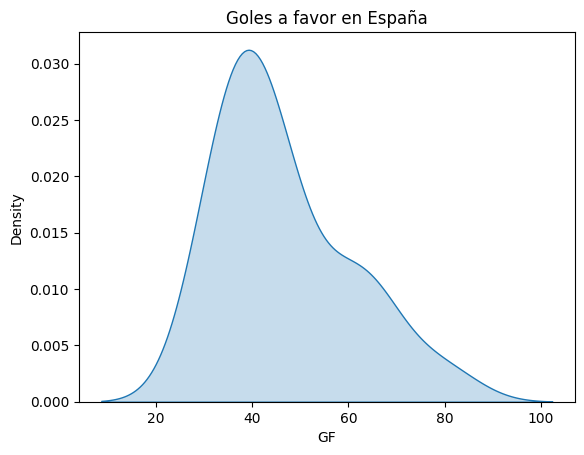

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(GF_ESP, shade=True)
plt.title('Goles a favor en España')

y efectivamente se asemeja bastante a una normal ... por otro lado tampoco tiene mucha lógica que los goles a favor sigan una distribución gaussiana en Italia e Inglaterra pero no en España, y por último, Italia, con un stat de 0,91 sí se considera gaussiana, mientras España está en el 0,89, ambas con 20 equipos. Por todo ello y de forma pragmática, en este caso, sí consideramos adecuado aplicar el test ANOVA.

In [81]:
from scipy.stats import f_oneway

stat, p = f_oneway(GF_ESP, GF_ENG, GF_ITA)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Las medias de goles a favor no presenta una diferencia significativa entre las tres ligas de España, Inglaterra e Italia.')
else:
 print('Alguna de las ligas entre España, Inglaterra e Italia, es significativamente más ofensiva que las otras.')

stat=0.807, p=0.451
Las medias de goles a favor no presenta una diferencia significativa entre las tres ligas de España, Inglaterra e Italia.


Aplicamos el test ANOVA para comparar las tres medias de goles a favor. El p-valor es de 0.451, es decir, también muy superior al 0.05 que nos permitiría descartar la hipótesis nula de que las medias son iguales. Por lo tanto concluímos que no hay una diferencia significativa en el nivel de dificultad de las ligas.

- H0: La media de goles a favor entre los principales equipos de las ligas española, italiana e inglesa es la misma.
- H1: La media de goles a favor no es la misma en estas tres ligas.
- p-valor = 0,451 > 0,05

Conclusión: no podemos descartar la hipótesis nula de que la media de goles a favor sea la misma entre las ligas española, italiana e inglesa, por lo tanto de que las tres ligas son iguales de ofensivas o defensivas. Es decir, de acuerdo con la muestra que representan los principales equipos de estas tres ligas, las tres son iguales de ofensivas o defensivas.

Finalmente, como resumen, primero hemos utilizado un test de Shapiro-Wilk para comprobar la normalidad de los datos referentes a los máximos goleadores de las ligas europeas, descartando la hipótesis de que sigan una distribución gaussiana - normal. En segundo lugar hemos comparado los dos 'atributos' de goles en contra para los 20 principales equipos de las ligas italiana y español con un test T, no pudiendo afirmar que la media de goles en contra en Italia sea significativamente menor que en España. Por último hemos utilizado un test ANOVA para comparar las medias de puntos por partido de los 20 principales equipos de las ligas española, inglesa e italiana, y tampoco hemos podido descartar que el nivel de dificultad sea parecido. En todos los casos el p-valor ha estado muy distante del necesario para concluir lo contrario.  
Destacar por sorprendente el primer caso, obteniendo una probabilidad del 0.00 para afirmar que los goles de los máximos artilleros de estas ligas no siguen una distribución normal.